# Project 3 : Web APIs and Classification
---

## Problem Statement

My consultancy company services clients from sports news outlets and sports marketing agencies. One of the clients would like to run marketing campaigns for its upcoming football event and wishes to target online audience who is interested in the English Premier League. Hence, he would like to explore and understand classification models that are able to predict whether a particular football-related post is about the English Premier League. 

For the aim of this project, data is collected from two subreddits of two of the most popular football leagues in the world - English Premier League and Champions League. The goal is to build and compare different classification models that would best predict whether a specific post belongs to the English Premier League subreddit. 

## Executive Summary

Data is collected from two subreddits of two of the most popular football leagues in the world - English Premier League and Champions League. In total, 1,935 posts are collected for this project. Out of these posts, 992 posts come from the Champions League subreddit while 943 posts come from the English Premier League subreddit.

As some of the posts content are empty, a new feature that combined the post title and content is created and further text analysis and modelling is based on this new feature. After lemmatization and data cleaning, which includes removing URL links and non-relevant words, the top unigrams, bigrams and trigrams for each subreddit are visualised and identified. 

It is evident from the visualisations that there are a significant number of words and phrases that are common between the two subreddits. Top English clubs like Manchester City and Chelsea are mentioned in both subreddits. Additionally, some common football-related terms like goal scored, yellow card and substitution are also found in both subreddits.

On the other hand, the words and phrases that are distinct to the English Premier League subreddit seem to be related to the mid/low-tiered premier league clubs like Aston Villa and West Ham. These clubs are not involved in the Champions League. Additionally, words that are specific to the Champions League subreddit are related to the format of the tournament itself, for example, final and round.

Overall, six different models are tested. These models are Multinomial Naive Bayes, Logistic Regression and K-Nearest Neighbours, each combined with either a Count Vectorizer or a TF-IDF Vectorizer. These models are run multiple times using GridSearch Cross Validation to find the optimal hyperparameters for each model. The models are then run again for the final time with their respective optimal hyperparameters. 

Since the aim of this project is to best predict whether a specific post belongs to the English premier league subreddit, minimizing the false positive cases and maximizing the true positive predictive value are key in determining the best model. Hence, accuracy and precision are two of the metrics that are used to compare the different models and identify the best one.

### Contents:
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Data Import](#2.-Data-Import)
- [3. Data Collection](#2.-Data-Collection)
- [4. Data Cleaning](#4.-Data-Cleaning)
    - [4.1. Data](#4.1.-Data)
    - [4.2. Missing Values](#4.2.-Missing-Values)
    - [4.3. Post Title](#4.3.-Post-Title)
    - [4.4. Post Content](#4.4.-Post-Content)
    - [4.5. New Features](#4.4.-New-Features)
    - [4.6. Data Cleaning](#4.4.-Data-Cleaning)
- [5. Data Visualisations](#5.-Data-Visualisations)
    - [5.1. Top Unigrams](#5.1.-Top-Unigrams)
    - [5.2. Top Bigrams](#5.2.-Top-Bigrams)
    - [5.3. Top Trigrams](#5.3.-Top-Trigrams)
    - [5.4. Top Bigrams/Trigrams](#5.4.-Top-Bigrams/Trigrams)
- [6. Models](#6.-Models)
    - [6.1. Pre-Processing](#6.1.-Pre-Processing)
    - [6.2. Multinomial Naive Bayes](#6.2.-Multinomial-Naive-Bayes)
    - [6.3. Logistic Regression](#6.3.-Logistic-Regression)
    - [6.4. K-Nearest Neighbours](#6.4.-K-Nearest-Neighbours)
- [7. Evaluation](#8.-Evaluation)
    - [7.1. Results Summary](#7.1.-Results-Summary)
    - [7.2. Model Selected](#7.2.-Model-Selected) 
- [8. Conclusions/Next Steps](#8.-Conclusions/Next-Steps)

## 1. Import Libraries
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import regex as re
import re
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, f1_score, plot_roc_curve

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, ImageColorGenerator

## 2. Data Import
---

In [2]:
# read the data
pd.set_option("display.max_columns", None)
epl = pd.read_csv("../data/premier_league_combined.csv")
cpl = pd.read_csv("../data/champions_league_combined.csv")

In [3]:
# display the premier league dataset
epl.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,post_hint,url_overridden_by_dest,preview,poll_data,crosspost_parent_list,crosspost_parent,media_metadata,is_gallery,gallery_data,author_cakeday,Unnamed: 0
0,NaN,PremierLeague,What's on your mind? This is the daily discuss...,t2_6l4z3,False,NaN,0,False,r/PremierLeague Daily Discussion,"[{'a': ':xpl:', 'e': 'emoji', 'u': 'https://em...",r/PremierLeague,False,6,NaN,0,NaN,NaN,False,t3_o2g36n,False,light,0.67,NaN,public,1,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},:xpl: Premier League,False,1,NaN,False,True,self,False,NaN,[],{},NaN,True,NaN,1.624018e+09,richtext,6,NaN,NaN,text,self.PremierLeague,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,new,NaN,NaN,False,False,False,False,False,[],[],False,d346d82a-a169-11ea-9cb6-0eab8b179a7f,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2scup,NaN,NaN,#38003c,o2g36n,True,NaN,AutoModerator,NaN,2,True,all_ads,False,[],False,NaN,/r/PremierLeague/comments/o2g36n/rpremierleagu...,all_ads,True,https://www.reddit.com/r/PremierLeague/comment...,548867,1.623989e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,PremierLeague,NaN,t2_rk9wt,False,NaN,0,False,The 2021/22 Premier League fixtures have been ...,"[{'a': ':xpl:', 'e': 'emoji', 'u': 'https://em...",r/PremierLeague,False,6,NaN,0,93.0,NaN,False,t3_o0zphv,False,light,0.99,transparent,public,727,2,{},140.0,4c5b1072-dcbc-11ea-a4e5-0ee875ec2147,False,[],NaN,False,False,NaN,{},:xpl: Premier League,False,727,NaN,False,False,https://b.thumbs.redditmedia.com/v4zbNch8T8r5u...,False,NaN,"[{'a': ':xpl:', 'e': 'emoji', 'u': 'https://em...",{},NaN,False,NaN,1.623859e+09,richtext,6,NaN,NaN,richtext,premierleague.com,False,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,d346d82a-a169-11ea-9cb6-0eab8b179a7f,False,False,False,:xpl:,[],False,NaN,NaN,NaN,t5_2scup,NaN,NaN,#38003c,o0zphv,True,NaN,pumkinhat,NaN,76,True,all_ads,False,[],False,dark,/r/PremierLeague/comments/o0zphv/the_202122_pr...,all_ads,True,https://www.premierleague.com/news/2171434,548867,1.623831e+09,1,NaN,False,link,https://www.premierleague.com/news/2171434,{'images': [{'source': {'url': 'https://extern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,PremierLeague,NaN,t2_rq268,False,NaN,0,False,Ashley Young agrees personal terms with Aston ...,"[{'a': ':ava:', 'e': 'emoji', 'u': 'https://em...",r/PremierLeague,False,6,NaN,0,78.0,NaN,False,t3_o23hs0,False,light,0.99,NaN,public,928,0,{},140.0,NaN,False,[],NaN,False,False,NaN,{},:ava: Aston Villa,False,928,NaN,False,False,https://b.thumbs.redditmedia.com/UFpjdsYEip11

In [4]:
# display the champions league dataset
cpl.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,thumbnail_height,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,thumbnail_width,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,is_created_from_ads_ui,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,post_hint,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,preview,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,poll_data,is_gallery,media_metadata,gallery_data,crosspost_parent_list,crosspost_parent,author_cakeday
0,NaN,championsleague,NaN,t2_1w0l1qv4,False,NaN,0,False,UEFA Champions League first qualifying round draw,[],r/championsleague,False,6,NaN,0,78.0,NaN,False,t3_o0ghwc,False,dark,0.96,NaN,public,17,0,{},140.0,NaN,False,[],NaN,False,False,NaN,{},NaN,False,17,NaN,False,False,https://b.thumbs.redditmedia.com/5w8DuQtwh9yxN...,False,NaN,[],{},link,NaN,False,NaN,1.623798e+09,text,6,NaN,NaN,text,uefa.com,False,NaN,NaN,NaN,NaN,https://www.uefa.com/uefachampionsleague/news/...,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://extern...,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qhv3,NaN,NaN,NaN,o0ghwc,True,NaN,VAR-Thread,NaN,0,True,all_ads,False,[],False,NaN,/r/championsleague/comments/o0ghwc/uefa_champi...,all_ads,True,https://www.uefa.com/uefachampionsleague/news/...,27581,1.623770e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,championsleague,NaN,t2_rk9wt,False,NaN,0,False,UEFA Champions League second qualifying round ...,[],r/championsleague,False,6,NaN,0,73.0,NaN,False,t3_o13bdy,False,dark,0.88,transparent,public,6,0,{},140.0,3926bc2c-0f7a-11eb-8887-0efcc643bfe9,False,[],NaN,False,False,NaN,{},NaN,False,6,NaN,False,False,https://b.thumbs.redditmedia.com/eUREcAPMkZ0e4...,False,NaN,"[{'a': ':FCBayern:', 'e': 'emoji', 'u': 'https...",{},link,NaN,False,NaN,1.623874e+09,text,6,NaN,NaN,richtext,uefa.com,False,NaN,NaN,NaN,NaN,https://www.uefa.com/uefachampionsleague/draws...,NaN,False,False,False,False,False,{'images': [{'source': {'url': 'https://extern...,[],[],False,False,False,False,:FCBayern:,[],False,NaN,NaN,NaN,t5_2qhv3,NaN,NaN,NaN,o13bdy,True,NaN,pumkinhat,NaN,1,True,all_ads,False,[],False,dark,/r/championsleague/comments/o13bdy/uefa_champi...,all_ads,True,https://www.uefa.com/uefachampionsleague/draws...,27581,1.623845e+09,0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,championsleague,Who will win and go to the next qualification ...,t2_8gmi25r4,False,NaN,0,False,PSV Eindhoven vs Galatasaray A.Ş.,[],r/championsleague,False,6,NaN,0,NaN,NaN,False,t3_o1btf0,False,dark,0.81,NaN,public,12,0,{},NaN,NaN,False,[],NaN,False,False,NaN,{},NaN,False,12,NaN,False,False,self,False,NaN,[],{},NaN,NaN,True,NaN,1.623897e+09,text,6,NaN,NaN,text,self.championsleague,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,[],[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qhv3,NaN,NaN,NaN,o1btf0,True,NaN,Assyrianandy,NaN,0,True,all

## 3. Data Collection
---

For this project, data was collected from two subreddits via the reddit API. The two subreddits are:
- English Premier League
- Champions League 

The API request for each subreddit was run multiple times so as to gather 700-1000 distinct posts for each subreddit. The multiple data files for each subreddit were then combined and duplicates removed. The codes and the steps taken for data collection are elaborated in the notebook entitled "Data Collection".

## 4. Data Cleaning/EDA
---

In this section, missing values from "selftext" are identified and replaced with an empty string. Pre-cleaning, the data for both EPL and CPL subreddits are explored to identify some of the top phrases in the title and the content of the EPL and CPL posts. Some of the top phrases that are common in both leagues are mostly team names like Manchester City. Based on these phrases, it is evident that there is a significant amount of noise and some data cleaning is required.

As some of the posts content are just null values, these null values are replaced with empty strings. Then, the title and content of the post are combined to create a new feature. Further text analysis and modelling will be done based on this newly combined feature. Then, data cleaning is done to remove any url links, non-alphabet characters, different variations of the league names (English Premier League and Champions league) and other non-relevant words. The data is explored again to see whether there are any rows with empty strings after the data cleaning. Rows that contain an empty string or only one word in the newly combined feature are removed from the datasets. 

- [4.1. Data](#4.1.-Data)
- [4.2. Missing Values](#4.2.-Missing-Values)
- [4.3. Post Title](#4.3.-Post-Title)
- [4.4. Post Content](#4.4.-Post-Content)
- [4.5. New Features](#4.4.-New-Features)
- [4.6. Data Cleaning](#4.4.-Data-Cleaning)

## 4.1. Data

In [5]:
# columns in the epl dataset
sorted(epl.columns)

['Unnamed: 0',
 'all_awardings',
 'allow_live_comments',
 'approved_at_utc',
 'approved_by',
 'archived',
 'author',
 'author_cakeday',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_at_utc',
 'banned_by',
 'can_gild',
 'can_mod_post',
 'category',
 'clicked',
 'content_categories',
 'contest_mode',
 'created',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'discussion_type',
 'distinguished',
 'domain',
 'downs',
 'edited',
 'gallery_data',
 'gilded',
 'gildings',
 'hidden',
 'hide_score',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_gallery',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'likes',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair

In [6]:
# columns in the cpl dataset
sorted(cpl.columns)

['all_awardings',
 'allow_live_comments',
 'approved_at_utc',
 'approved_by',
 'archived',
 'author',
 'author_cakeday',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_at_utc',
 'banned_by',
 'can_gild',
 'can_mod_post',
 'category',
 'clicked',
 'content_categories',
 'contest_mode',
 'created',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'discussion_type',
 'distinguished',
 'domain',
 'downs',
 'edited',
 'gallery_data',
 'gilded',
 'gildings',
 'hidden',
 'hide_score',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_gallery',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'likes',
 'link_flair_background_color',
 'link_flair_css_class',
 'link_flair_richtext',
 'l

In [7]:
# epl dataset
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Columns: 117 entries, approved_at_utc to Unnamed: 0
dtypes: bool(27), float64(22), int64(10), object(58)
memory usage: 688.0+ KB


In [8]:
# cpl dataset
cpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Columns: 115 entries, approved_at_utc to author_cakeday
dtypes: bool(27), float64(29), int64(10), object(49)
memory usage: 708.3+ KB


The dataset contains 1,935 total observations. Out of which, 992 of those observations came from champions league subreddit while 943 came from premier league subreddit. For this project, only "subreddit", "selftext" and "title" columns will be included in the analysis. All the other columns will be dropped. 

In [9]:
# select "subreddit", "selftext", "title"
cpl = cpl[["subreddit", "selftext", "title"]]
epl = epl[["subreddit", "selftext", "title"]]

## 4.2. Missing Values

In [10]:
# null value count epl dataset
epl.isnull().sum()

subreddit      0
selftext     273
title          0
dtype: int64

In [11]:
# null value count cpl dataset
cpl.isnull().sum()

subreddit      0
selftext     460
title          0
dtype: int64

There are 273 null values for "selftext" feature in the premier league dataset and 460 null values for "selftext" feature in the champions league dataset. These null values will be replaced with an empty string. 

In [12]:
# create a function to replace na with empty string
def replace_na(dataframe, column, string):
    dataframe[column] = dataframe[column].fillna(string)
    
    return dataframe

In [13]:
epl = replace_na(epl, "selftext", "")
cpl = replace_na(cpl, "selftext", "")

In [14]:
# check the null value count for epl dataset
epl.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

In [15]:
# check the null value count for cpl dataset
cpl.isnull().sum()

subreddit    0
selftext     0
title        0
dtype: int64

## 4.3. Post Title

In [16]:
# create a function to get the top 20 phrases in the title/content with the highest count
def top_phrases(dataframe, column_name, n):
    cvec = CountVectorizer(stop_words="english", ngram_range=(2,3))
    df = cvec.fit_transform(dataframe[column_name])
    df = pd.DataFrame(df.toarray(), columns=cvec.get_feature_names())
    df_n = pd.DataFrame(df.sum().sort_values(ascending=False).head(n), columns=["count"])
    df_n["phrases"] = df_n.index
    df_n = df_n.reset_index(drop=True)
    
    return df_n

In [17]:
# create a function to generate bar charts
def plot_barh(df1, df2, x_column_name, y_column_name, list_subtitles, main_title):
    sns.set_style("white")
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    
    # epl
    df1.sort_values(y_column_name, inplace=True)
    ax[0].barh(df1[x_column_name], df1[y_column_name], color="palevioletred")
    ax[0].set_title(list_subtitles[0], fontsize=15)
    ax[0].set_xlabel(y_column_name, fontsize=12)
    ax[0].tick_params(labelsize=12)
    
    
    # cpl
    df2.sort_values(y_column_name, inplace=True)
    ax[1].barh(df2[x_column_name], df2[y_column_name], color="skyblue")
    ax[1].set_title(list_subtitles[1], fontsize=15)
    ax[1].set_xlabel(y_column_name, fontsize=12)
    ax[1].tick_params(labelsize=12)
    
    
    plt.suptitle(main_title, fontweight="bold", fontsize=20)
    fig.tight_layout(pad=2)
    
    return plt.show()

In [18]:
# apply the function to get the top 20 phrases in the post titles
epl_title20 = top_phrases(epl, "title", 20)
cpl_title20 = top_phrases(cpl, "title", 20)

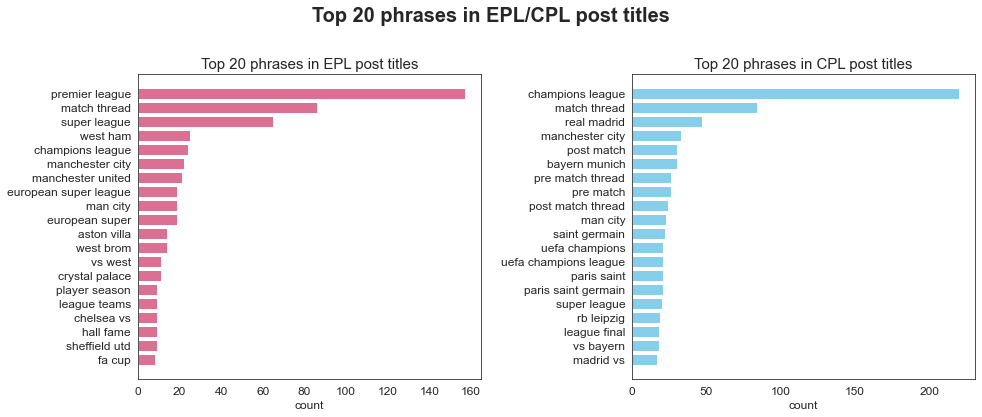

In [19]:
# bar plot to display top 20 phrases for epl and cpl post title
plot_barh(epl_title20, 
          cpl_title20, 
          "phrases", 
          "count", 
          ["Top 20 phrases in EPL post titles", "Top 20 phrases in CPL post titles"], 
          "Top 20 phrases in EPL/CPL post titles")

For both epl and cpl data, top phrases in post titles mostly contain team names. Additionally, they also contain the respective league names, like "premier league" and "champions league". For the aim of building an effective classifier for these two subreddits, phrases like "premier league" and "champions league" and different variations of these phrases, will be removed. 

There are also some similar words that are spelled differently like "man city" and "manchester city". As both these phrases refer to the same team, "man city" will be amended to "manchester city". 

## 4.4. Post Content

In [20]:
# apply the function to get the top 20 phrases in the post content
epl_content20 = top_phrases(epl, "selftext", 20)
cpl_content20 = top_phrases(cpl, "selftext", 20)

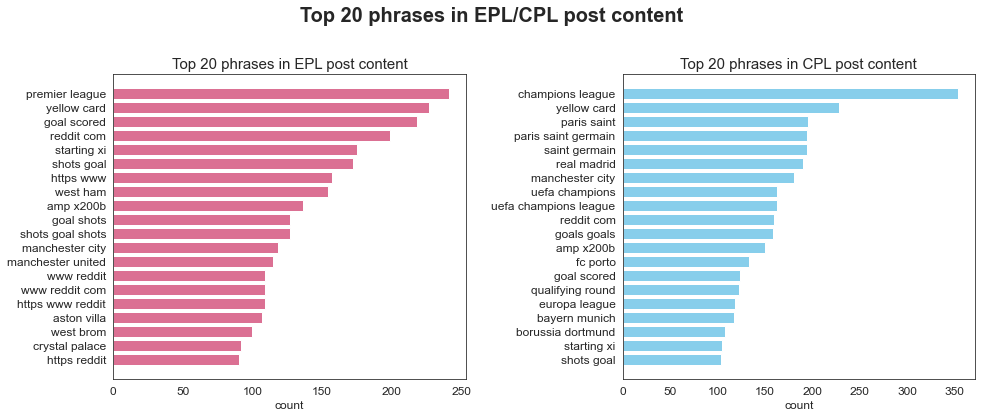

In [21]:
# bar plot to display top 20 phrases for epl and cpl post content
plot_barh(epl_content20, 
          cpl_content20, 
          "phrases", 
          "count", 
          ["Top 20 phrases in EPL post content", "Top 20 phrases in CPL post content"], 
          "Top 20 phrases in EPL/CPL post content")

For both epl and cpl data, top phrases in post content mostly contain team names. Additionally, they also contain the respective league names, like "premier league" and "champions league". For the aim of building an effective classifier for these two subreddits, phrases like "premier league" and "champions league" and different variations of these phrases, will be removed. 

Moreover, additional cleaning would also be needed to remove the URL links as they seem to appear in a significant number of content. Lemmatization would also be used so that similar words like "goal" and "goals" would be amended to be the same word. Similarly, similar words that are spelled differently but cannot be corrected via lemmatization, like "man city" and "manchester city", will also be manually amended. As both these phrases refer to the same team, "man city" will be amended to "manchester city". 

## 4.5. New Features

As some of the data for "selftext" feature is just an empty string, a new feature that combines both "selftext" and "title" will be created. For further text analysis and building of the classification model, "combined_text" feature will be used.

Further checking of the number of unique values for "combined_text" feature confirm that there are no duplicate posts for both cpl and epl datasets.

In [22]:
# create a function to combine features
def new_feat(dataframe):
    # combine title with text
    dataframe["combined_text"] = dataframe["title"] + " " + dataframe["selftext"]    
    # character length of selftext
    dataframe["text_len"] = dataframe["selftext"].astype(str).apply(len)
    # word count of selftext
    dataframe["text_count"] = dataframe["selftext"].apply(lambda x: len(x.split()))
    # character length of combined text
    dataframe["combined_len"] = dataframe["combined_text"].astype(str).apply(len)
    # word count of selftext
    dataframe["combined_count"] = dataframe["combined_text"].apply(lambda x: len(x.split()))
   
    return dataframe

In [23]:
epl = new_feat(epl)
cpl = new_feat(cpl)

In [24]:
# check the number of unique values
len(epl["combined_text"].unique())

943

In [25]:
# check the number of unique values
len(cpl["combined_text"].unique())

992

### Word Count - Premier League

In [26]:
# create a function to plot histograms
def plot_histogram(dataframe, list_of_columns, list_of_xlabels, bins, main_title, n):
    sns.set_style("white")
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14, nrows*5))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], color="cornflowerblue", bins=bins)
        ax[i].axvline(np.mean(dataframe[column]), color="mediumvioletred", linewidth=2, label="Mean")
        ax[i].axvline(np.median(dataframe[column]), color="teal", linestyle="dashed", linewidth=2, label="Median")
        ax[i].legend()
        #ax[i].set_title(list_of_subtitles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels[i])
    
    if len(list_of_columns) % 2 != 0:
        plt.delaxes(ax=ax[len(list_of_columns)])
    
    plt.xticks(rotation=n)
    plt.suptitle(main_title, fontsize=20, fontweight="bold")
    fig.tight_layout(pad=2)
    
    return plt.show()

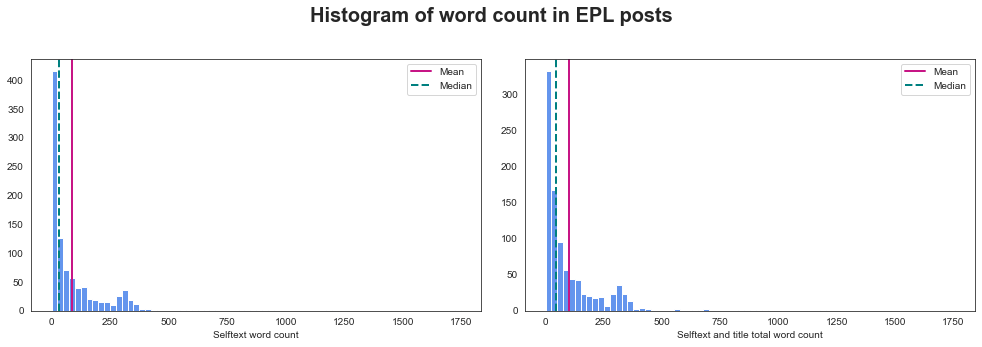

In [27]:
plot_histogram(epl, 
               ["text_count", "combined_count"], 
               ["Selftext word count", "Selftext and title total word count"], 
               70, 
               "Histogram of word count in EPL posts", 
               0)

Based on the histogram plot above, the word count from premier league posts has extreme values. The word count averages for only selftext and combined selftext and title are higher than their respective medians. And their medians are higher than their respective modes(which is close to 0). Thus, indicating that the word count distribution for both features are skewed to the right. 

Additionally, the mode for both distributions is close to 0, indicating that there is a significant number of EPL posts that have very short content.

### Word Count - Champions League

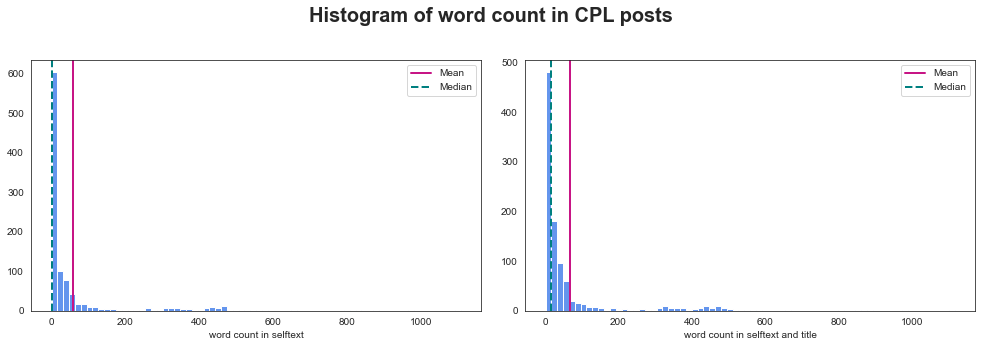

In [28]:
plot_histogram(cpl, 
               ["text_count", "combined_count"], 
               ["word count in selftext", "word count in selftext and title"], 
               70, 
               "Histogram of word count in CPL posts", 
               0)

Based on the histogram plot above, the word count for champions league posts has extreme values. The word count averages for only selftext and combined selftext and title are higher than their respective medians. 

Additionally, the mode for both distribution is close to 0, indicating that there is a significant number of CPL posts that have very short content.

## 4.6. Data Cleaning

As identified in previous sub-sections, the raw corpus contains several issues. Hence, some pre-processing and cleaning are required to prepare the data for modelling. Some of the steps taken include:

- removing URLS
- removing non-letters
- lemmatization of words
- removing words with 1 or 2 characters
- removing word or phrases that are similar to the phrase "premier league" or "champions league"
- removing additional words that are not relevant
- removing the rows that have 1 word or less in the newly cleaned "clean_com_text" feature (17 observations dropped - 2 from epl and 15 from cpl)


In [29]:
def clean_data(dataframe):
    # remove url
    dataframe["clean_com_text"] = dataframe["combined_text"].\
    apply(lambda x: re.sub("https:\/\/.*", " ", str(x)))
    
    # remove non-letters
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    str.replace("[^a-zA-Z]", " ")
       
    # convert all string to lowercase and split the sentences
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: x.lower().split())
       
    # lemmatize
    lemmatizer = WordNetLemmatizer()
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
    
    # remove words with 1 or 2 characters
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: [word for word in x if len(str(word)) > 2])
     
    # join the tokens together
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: " ".join([word for word in x]))
    
    # list of topic words to remove
    remove_list = ["premierleague", "premier league", "champions league", 
                   "championsleague", "epl", "ucl", 
                   "uefa champions league", "uefa cl", "uefa", 
                   "champion league", "europa league"]
    
    # remove the list above from the data
    for word in remove_list:
        dataframe["clean_com_text"] = dataframe["clean_com_text"].\
        str.replace(word, "")
        
    # additional stop words to remove
    my_stop_words = ["just", "think", "which", "like", 
                     "will", "this", "that", "what", 
                     "have", "they", "with", "would", 
                     "your", "from", "their", "about"]
    
    for word in my_stop_words:
        dataframe["clean_com_text"] = dataframe["clean_com_text"].\
        str.replace(word, "")
    
    # change man city to manchester city
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: re.sub("man city", "manchester city", x))
    # change barca to barcelona
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: re.sub("barca", "barcelona", x))
    # change paris saint germain to psg
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: re.sub("paris saint germain", "psg", x)) 
      
    return dataframe

In [30]:
epl = clean_data(epl)
cpl = clean_data(cpl)

<ipython-input-29-15a6b0e79652>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe["clean_com_text"] = dataframe["clean_com_text"].\


In [32]:
# cpl dimension
cpl.shape

(992, 9)

In [33]:
# epl dimension
epl.shape

(943, 9)

In [34]:
# create a function to see the number of words for the newly cleaned "clean_com_text"
def clean_wordcount(dataframe):
    dataframe["clean_com_text"] = dataframe["clean_com_text"].apply(lambda x: x.split())
    dataframe["clean_com_text"] = dataframe["clean_com_text"].apply(lambda x: ["club" if word == "ub" else word for word in x])
    dataframe["clean_word_count"] = dataframe["clean_com_text"].apply(lambda x: len(x))
    
    return dataframe

In [35]:
epl = clean_wordcount(epl)
cpl = clean_wordcount(cpl)

In [36]:
# view the rows with 1 or 0 word count
epl[epl["clean_word_count"] < 2][["subreddit", "clean_com_text", "clean_word_count"]]

,subreddit,clean_com_text,clean_word_count
229,PremierLeague,[animated],1
652,PremierLeague,[saynotosuperleague],1


In [37]:
# view the rows with 1 or 0 word count
cpl[cpl["clean_word_count"] < 2][["subreddit", "clean_com_text", "clean_word_count"]]

,subreddit,clean_com_text,clean_word_count
18,championsleague,[chelsea],1
83,championsleague,[final],1
112,championsleague,[comment],1
121,championsleague,[ligue],1
170,championsleague,[semifinal],1
233,championsleague,[],0
354,championsleague,[],0
500,championsleague,[var],1
596,championsleague,[delight],1
680,championsleague,[not],1


In [38]:
# create a function to drop rows that contain 1 or 0 word count for "clean_com_text"
def drop_rows(dataframe):
    dataframe = dataframe.drop(dataframe[dataframe["clean_word_count"] <= 1].index)
    dataframe["clean_com_text"] = dataframe["clean_com_text"].\
    apply(lambda x: " ".join([word for word in x]))
    
    return dataframe

In [39]:
epl = drop_rows(epl)
cpl = drop_rows(cpl)

In [40]:
# new cpl dimension (15 obs dropped)
cpl.shape

(977, 10)

In [41]:
# new epl dimension (2 obs dropped)
epl.shape

(941, 10)

## 5. Data Visualisations
---

In this section, top unigrams, bigrams and trigrams of the cleaned text from EPL and CPL subreddits will be identified by using data visualizations. The visualizations explored include horizontal bar chart and venn diagram. Based from the charts, it is evident that these two datasets contain a significant number of similar popular words and phrases, like team names such as Manchester City. And common football-related words such as goal and yellow card. 

The words and phrases that are distinct to each subreddit are also related to team names. Low and mid-tier clubs like Aston Villa are found in the EPL subreddit while some non-english clubs like Paris Saint Germain are only found in the CPL subreddit. Furthermore, words that are specific to the format of the CPL tournament like qualifying round is also only found in the CPL subreddit. 

Additionally, comparisons will be made between the top n-grams that include stop words and the top n-grams that exclude stop words. As expected, the list of top-ngrams that exclude stop words contain much more relevant keywords that are associated with the EPL and/or CPL subreddits.

- [5.1. Top Unigrams](#5.1.-Top-Unigrams)
- [5.2. Top Bigrams](#5.2.-Top-Bigrams)
- [5.3. Top Trigrams](#5.3.-Top-Trigrams)
- [5.4. Top Bigrams/Trigrams](#5.4.-Top-Bigrams/Trigrams)

## 5.1. Top Unigrams

### Including Stopwords

In [42]:
# create a function to generate the top n ngrams
def get_top_ngram(corpus, n, ngram_range, stop_words=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:n]

In [43]:
# create a function to generate venn diagram
def plot_venn(epl_df, cpl_df, variable, size):
    plt.figure(figsize=size)
    epl_set = set(epl_df[variable])
    cpl_set = set(cpl_df[variable])
    
    venn = venn2([epl_set, cpl_set], 
                 set_labels=("English Premier League", "Champions League"), 
                 set_colors=("palevioletred", "skyblue"), 
                 alpha=0.5)
    venn.get_label_by_id("100").set_text("\n".join(map(str, epl_set-cpl_set)))
    venn.get_label_by_id("110").set_text("\n".join(map(str, epl_set&cpl_set)))
    venn.get_label_by_id("010").set_text("\n".join(map(str, cpl_set-epl_set)))
    
    venn.get_label_by_id("A").set_size(20)
    venn.get_label_by_id("B").set_size(20)
    venn.get_label_by_id("100").set_size(13)
    venn.get_label_by_id("110").set_size(13)
    venn.get_label_by_id("010").set_size(13)
      
    return plt.show()

In [44]:
# epl top 20 words (including stopwords)
epl_unigram = get_top_ngram(epl["clean_com_text"], 20, (1, 1))
epl_unigram_df = pd.DataFrame(epl_unigram, columns = ["word", "count"])

# cpl top 20 words (including stopwords)
cpl_unigram = get_top_ngram(cpl["clean_com_text"], 20, (1,1))
cpl_unigram_df = pd.DataFrame(cpl_unigram, columns = ["word", "count"])

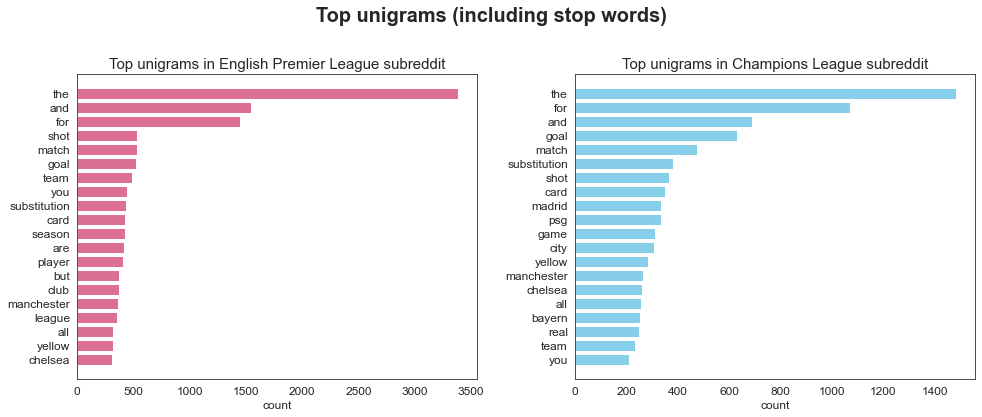

In [45]:
df1 = epl_unigram_df
df2 = cpl_unigram_df
list_subtitles = ["Top unigrams in English Premier League subreddit", 
                  "Top unigrams in Champions League subreddit"]
main_title = "Top unigrams (including stop words)"
plot_barh(df1, df2, "word", "count", list_subtitles, main_title)

Most of the the top unigrams for EPL and CPL subreddits are stopwords. The top unigrams for these two subreddits are mostly similar. Some of the common and relevant words that can be found for both subreddits are goal, match, substitution, card and shot. These words are commonly used in reference to a football game.

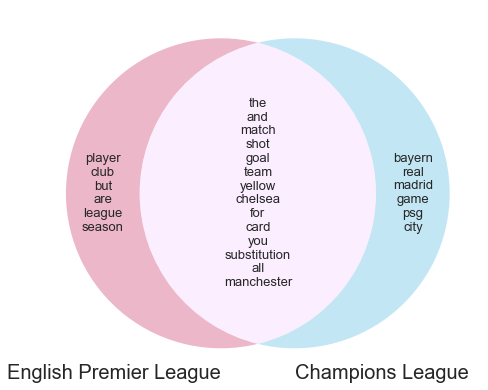

In [46]:
plot_venn(epl_unigram_df, cpl_unigram_df, "word", (8,8))

Based on the venn diagram of top unigrams (including stop words), keywords that are associated with english club names like Chelsea and Manchester City are found in both subreddits. On the other hand, keywords that are associated with non-english clubs, like Bayern, are only found in the CPL subreddit.

### Excluding Stopwords

In [47]:
# epl top 20 unigrams (excluding stopwords)
epl_unigram_nostop = get_top_ngram(epl["clean_com_text"], 20, (1, 1), "english")
epl_unigram_nostopdf = pd.DataFrame(epl_unigram_nostop, columns = ["word", "count"])

# cpl top 20 unigrams (excluding stopwords)
cpl_unigram_nostop = get_top_ngram(cpl["clean_com_text"], 20, (1, 1), "english")
cpl_unigram_nostopdf = pd.DataFrame(cpl_unigram_nostop, columns = ["word", "count"])

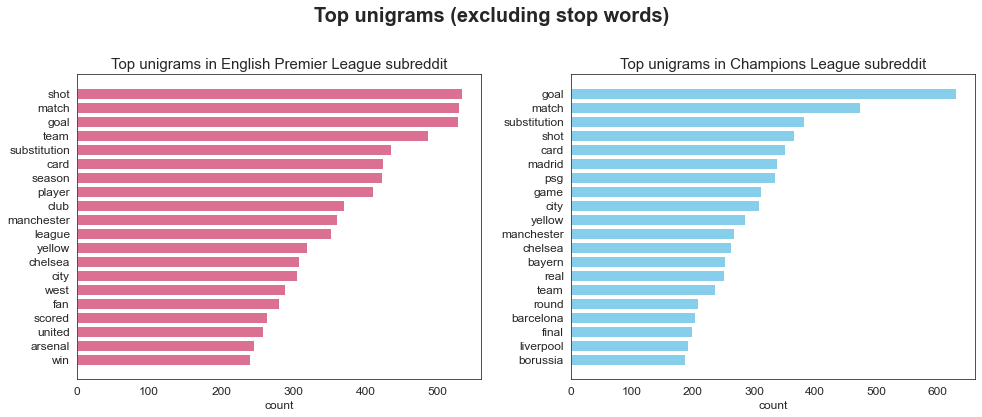

In [48]:
df1 = epl_unigram_nostopdf
df2 = cpl_unigram_nostopdf
list_subtitles = ["Top unigrams in English Premier League subreddit", 
                  "Top unigrams in Champions League subreddit"]
main_title = "Top unigrams (excluding stop words)"
plot_barh(df1, df2, "word", "count", list_subtitles, main_title)

After removing the stopwords, the top unigrams for these two subreddits still have a significant number of common words. Some of the common and relevant words that can be found in both subreddits are goal, match, substitution, card and shot. These words are usually used in reference to a football game.

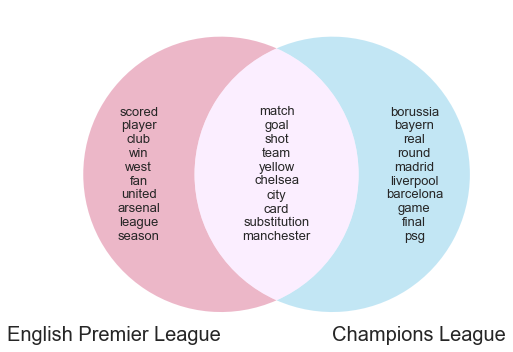

In [49]:
plot_venn(epl_unigram_nostopdf, cpl_unigram_nostopdf, "word", (8,8))

Based on the venn diagram of top unigrams (excluding stop words), keywords that are associated with english club names like Chelsea and Manchester city are found in both subreddits. Meanwhile, Liverpool, is one of the top unigrams in the CPL subreddit. 

On the other hand, keywords that are associated with non-english clubs are only found in the CPL subreddit. Additionally, words that are related to the specific format of the CPL tournament like final and round are only found in the CPL subreddit.

## 5.2. Top Bigrams

### Including Stopwords

In [50]:
# epl
epl_bigram = get_top_ngram(epl["clean_com_text"], 20, (2, 2))
epl_bigram_df = pd.DataFrame(epl_bigram, columns = ["word", "count"])

# cpl
cpl_bigram = get_top_ngram(cpl["clean_com_text"], 20, (2, 2))
cpl_bigram_df = pd.DataFrame(cpl_bigram, columns = ["word", "count"])

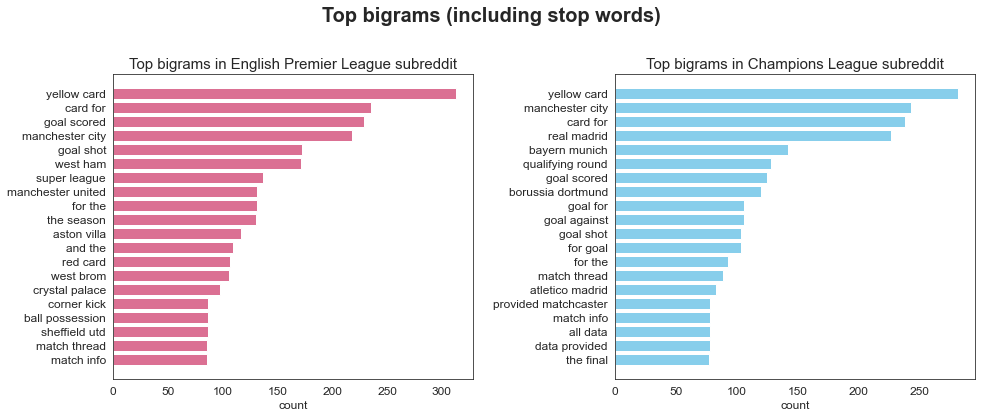

In [51]:
df1 = epl_bigram_df
df2 = cpl_bigram_df
list_subtitles = ["Top bigrams in English Premier League subreddit", 
                  "Top bigrams in Champions League subreddit"]
main_title = "Top bigrams (including stop words)"
plot_barh(df1, df2, "word", "count", list_subtitles, main_title)

Like the top unigrams above, there are a number of similar bigrams between these two subreddits. Some of the common and relevant words that can be found in both subreddits are yellow card and match thread.

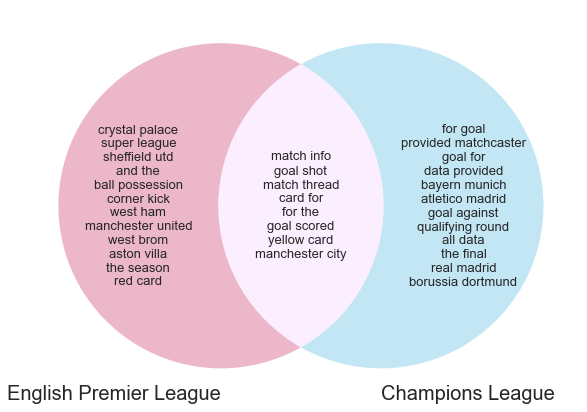

In [52]:
plot_venn(epl_bigram_df, cpl_bigram_df, "word", (10, 10))

Based on the venn diagram of top bigrams (including stop words), keywords that are associated with some english clubs like Aston Villa and West Ham are found in the EPL subreddit while clubs like Manchester City are found in both subreddits.

On the other hand, keywords that are associated with non-english clubs (like Bayern Munich) are only found in the CPL subreddit. Additionally, words that are related to the specific format of the CPL tournament like qualifying round are only found in the CPL subreddit.

### Excluding Stopwords

In [53]:
# epl
epl_bigram_nostop = get_top_ngram(epl["clean_com_text"], 20, (2, 2), "english")
epl_bigram_nostopdf = pd.DataFrame(epl_bigram_nostop, columns = ["word", "count"])

# cpl
cpl_bigram_nostop = get_top_ngram(cpl["clean_com_text"], 20, (2, 2), "english")
cpl_bigram_nostopdf = pd.DataFrame(cpl_bigram_nostop, columns = ["word", "count"])

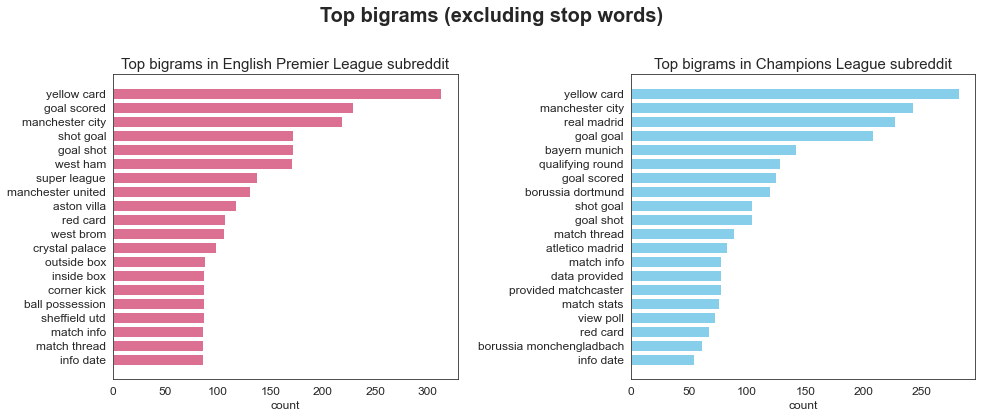

In [54]:
df1 = epl_bigram_nostopdf
df2 = cpl_bigram_nostopdf
list_subtitles = ["Top bigrams in English Premier League subreddit", 
                  "Top bigrams in Champions League subreddit"]
main_title = "Top bigrams (excluding stop words)"
plot_barh(df1, df2, "word", "count", list_subtitles, main_title)

After removing the stopwords, the top bigrams for these two subreddits have some similar words, but not as much as the top unigrams. Some of the common and relevant words that can be found for both subreddits are yellow card and goal scored.

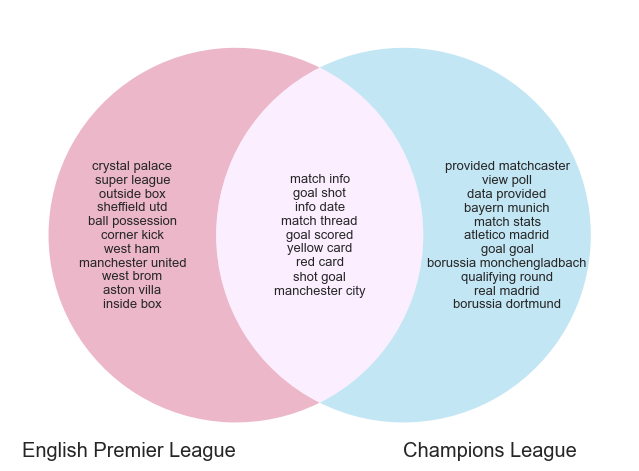

In [55]:
plot_venn(epl_bigram_nostopdf, cpl_bigram_nostopdf, "word", (11.2, 11.2))

Based on the venn diagram of top bigrams (excluding stop words), keywords that are associated with some english clubs like Aston villa and West Ham are found in the EPL subreddit while clubs like Manchester City are found in both subreddits.

On the other hand, keywords that are associated with non-english clubs (eg. Real Madrid) are only found in the CPL subreddit. Additionally, words that are related to the specific format of the CPL tournament like qualifying round are only found in the CPL subreddit.

## 5.3. Top Trigrams

### Including Stopwords

In [56]:
# epl
epl_trigram = get_top_ngram(epl["clean_com_text"], 20, (3, 3))
epl_trigram_df = pd.DataFrame(epl_trigram, columns = ["word", "count"])

# cpl
cpl_trigram = get_top_ngram(cpl["clean_com_text"], 20, (3, 3))
cpl_trigram_df = pd.DataFrame(cpl_trigram, columns = ["word", "count"])

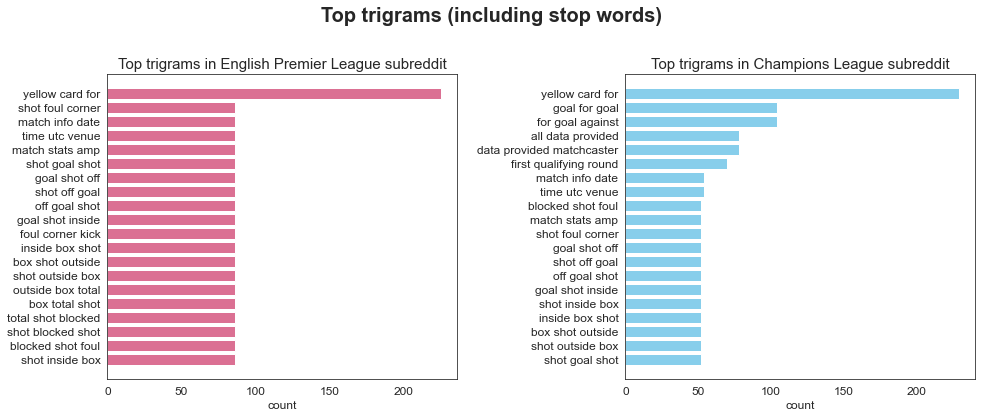

In [57]:
df1 = epl_trigram_df
df2 = cpl_trigram_df
list_subtitles = ["Top trigrams in English Premier League subreddit", 
                  "Top trigrams in Champions League subreddit"]
main_title = "Top trigrams (including stop words)"
plot_barh(df1, df2, "word", "count", list_subtitles, main_title)

The top trigrams(including stopwords) for these two subreddits contain many common words. Some of the common and relevant words that can be found in both subreddits include match info date and off goal shot. Many of these phrases come from post-match commentary posts. These posts mainly contain the summary and overall statistics about a specific match.

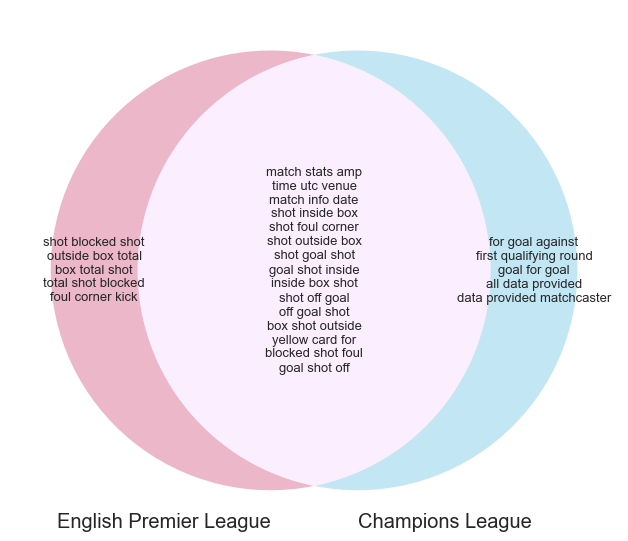

In [58]:
plot_venn(epl_trigram_df, cpl_trigram_df, "word", (11, 11))

### Excluding Stopwords

In [59]:
# epl
epl_trigram_nostop = get_top_ngram(epl["clean_com_text"], 20, (3, 3), "english")
epl_trigram_nostopdf = pd.DataFrame(epl_trigram_nostop, columns = ["word", "count"])

# cpl
cpl_trigram_nostop = get_top_ngram(cpl["clean_com_text"], 20, (3, 3), "english")
cpl_trigram_nostopdf = pd.DataFrame(cpl_trigram_nostop, columns = ["word", "count"])

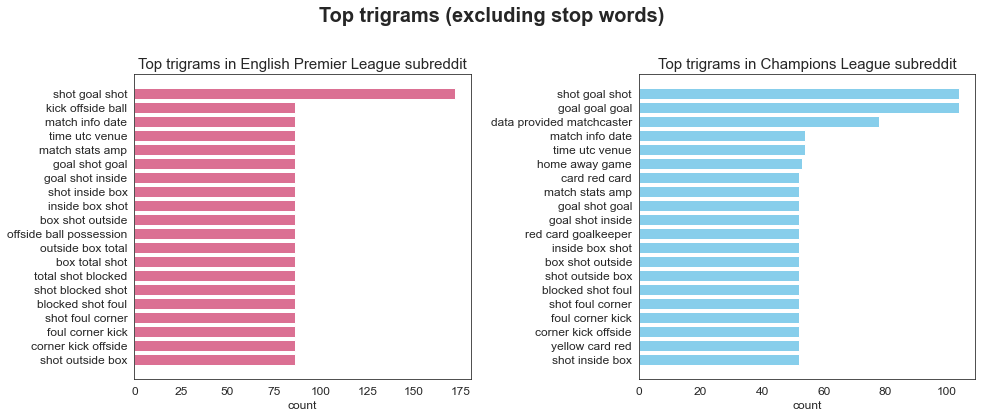

In [60]:
df1 = epl_trigram_nostopdf
df2 = cpl_trigram_nostopdf
list_subtitles = ["Top trigrams in English Premier League subreddit", 
                  "Top trigrams in Champions League subreddit"]
main_title = "Top trigrams (excluding stop words)"
plot_barh(df1, df2, "word", "count", list_subtitles, main_title)

Similarly, the top trigrams(excluding stopwords) for these two subreddits contain many common words. Some of the common and relevant words that can be found in both subreddits include offside ball possession and shot goal shot. Many of these phrases are found in post-match commentary posts. These posts mainly contain the summary and overall statistics about a specific match.

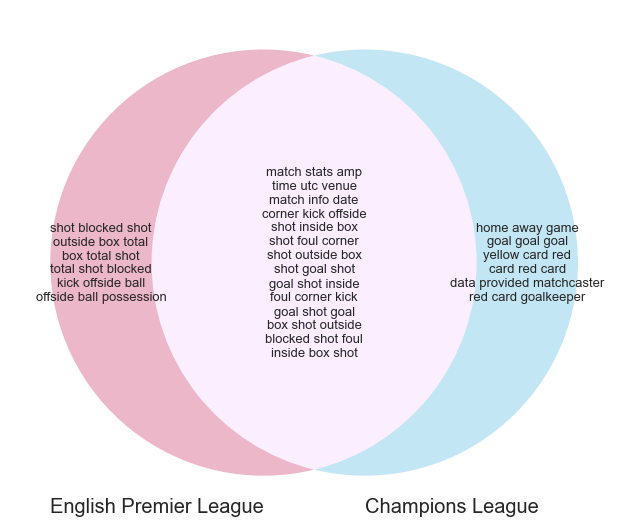

In [61]:
plot_venn(epl_trigram_nostopdf, cpl_trigram_nostopdf, "word", (11, 11))

## 5.4. Top Bigrams/Trigrams

### Excluding Stopwords

In [62]:
# epl
epl_bitri_nostop = get_top_ngram(epl["clean_com_text"], 20, (2, 3), "english")
epl_bitri_nostopdf = pd.DataFrame(epl_bitri_nostop, columns = ["word", "count"])

# cpl
cpl_bitri_nostop = get_top_ngram(cpl["clean_com_text"], 20, (2, 3), "english")
cpl_bitri_nostopdf = pd.DataFrame(cpl_bitri_nostop, columns = ["word", "count"])

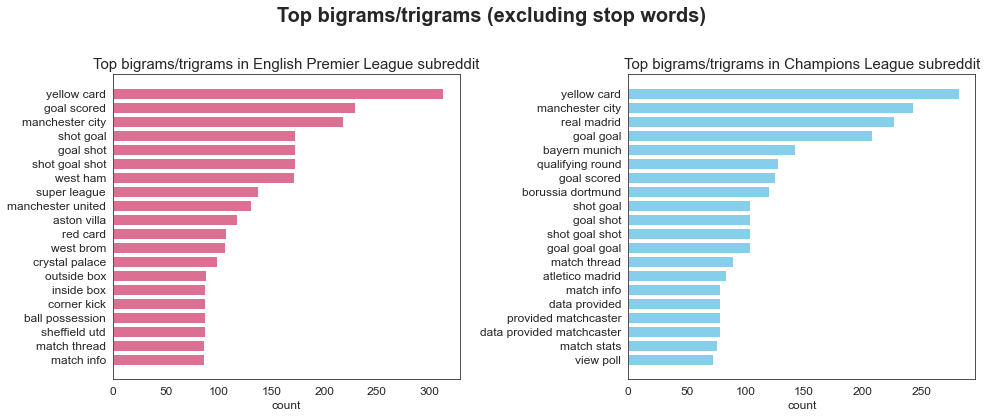

In [63]:
df1 = epl_bitri_nostopdf
df2 = cpl_bitri_nostopdf
list_subtitles = ["Top bigrams/trigrams in English Premier League subreddit", 
                  "Top bigrams/trigrams in Champions League subreddit"]
main_title = "Top bigrams/trigrams (excluding stop words)"
plot_barh(df1, df2, "word", "count", list_subtitles, main_title)

The top bigrams/trigrams for these two subreddits have a significant number of common phrases. The top phrases for the EPL subreddit are only  bigrams, some of which are the english club names like Aston Villa. On the other hand, the top phrases for the CPL subreddit contains a mixture of bigrams and trigrams.

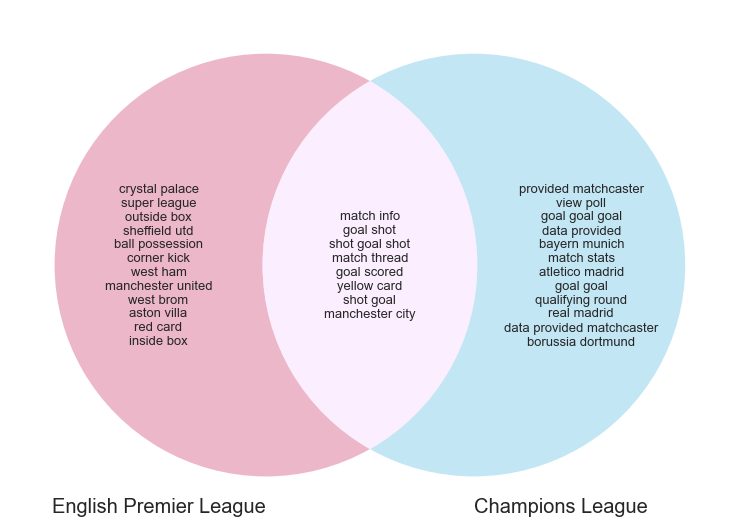

In [64]:
plot_venn(epl_bitri_nostopdf, cpl_bitri_nostopdf, "word", (13, 13))

Based on the venn diagram above, keywords that are associated with some english clubs like West Brom and Sheffield Utd are found in the EPL subreddit while clubs like Manchester City are found in both subreddits.

Similarly, like in other venn diagrams, keywords that are associated with non-english clubs (like Paris Saint Germain) are only found in the CPL subreddit. Additionally, words that are related to the specific format of the CPL tournament like qualifying round are also only found in the CPL subreddit.

## 6. Models
---

There are similar number of posts from the EPL and CPL subreddits, indicating that there is no class imbalance. Hence, one of the metrics that will be used for the comparison of the different classification models is accuracy. This is a measure of the proportion of true predictions (true positive and true negative) over all predictions. 

Additionally, as the aim of this project is to identify a classification model that can correctly predict whether a specific post belongs to the EPL subreddit, minimizing the false positive cases (posts that are predicted to belong to EPL subreddit but actually belong to CPL subreddit) is also essential. Hence, the other metric that will also be looked at is precision.

In this section, six different models are tested and compared. These models are Multinomial Naive Bayes, Logistic Regression and K-Nearest Neighbours, each combined with either the count vectorizer or tf-idf vectorizer in the pipeline. 

These models are run multiple times using GridSearch Cross Validation to find the optimal hyperparameters for each model. The models are then run again for the final time with their respective optimal hyperparameters. The accuracy and precision score of these models are then noted and compared.

Overall, based on the scores, the logistic regression with tf-idf vectorizer performed the best amongst all the models, followed by the multinomial naive bayes with tf-idf vectorizer.

- [6.1. Pre-Processing](#6.1.-Pre-Processing)
- [6.2. Multinomial Naive Bayes](#6.2.-Multinomial-Naive-Bayes)
- [6.3. Logistic Regression](#6.3.-Logistic-Regression)
- [6.4. K Nearest Neighbours](#6.4.-K-Nearest-Neighbours)

## 6.1. Pre Processing

In [65]:
# combine the datasets
football = pd.concat([epl, cpl], axis=0)

In [66]:
# label 1 if the post is from premier league subreddit and 0 otherwise
football["label"] = football["subreddit"].map(lambda x: 1 if x == "PremierLeague" else 0)

In [67]:
# define X(features) and y(target) - with clubs
X = football[["clean_com_text"]]
y = football["label"]

In [68]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=y)

### Baseline Score

The baseline model would predict the positive class, english premier league subreddit for all posts. And based on the model, it would have an accuracy of 48.96%.

In [69]:
# baseline score - 48.96% accuracy
y_test.value_counts(normalize=True)

0    0.510417
1    0.489583
Name: label, dtype: float64

## 6.2. Multinomial Naives Bayes

The Multinomial Naïve Bayes model is run with either a Count Vectorizer or a TF-IDF Vectorizer. These two models are run multiple times using the GridSearch Cross Validation to find the optimal hyperparameters for each model. The models are then run again with the optimal hyperparameters.

Overall, the Naïve Bayes model using the TF-IDF Vectorizer has a slightly higher accuracy score than the one using the Count Vectorizer. TF-IDF Vectorizer gives a higher score to words that are less common and appear in fewer documents. Hence, words and phrases like West Ham which is specific to English Premier League subreddit and final which is specific to the Champions League subreddit, are given higher scores compared to common words like substitution and yellow card which can be found in a significant number of posts in both subreddits.

### Count Vectorizer

In [70]:
# results to store the results for each model (dictionary)
results = {}

In [71]:
# pipeline
pipe_nb_cvec = Pipeline([
    ("cvec", CountVectorizer()), 
    ("nb", MultinomialNB())
])

pipe_nb_cvec_params = {
    "cvec__stop_words": ["english", None],
    "cvec__max_features": [1000, 2000, 3000, 4000], 
    "cvec__min_df": [3, 4, 5, 6],
    "cvec__max_df": [0.5, 0.6, 0.7],
    "cvec__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 3)], 
}

gs = GridSearchCV(
    pipe_nb_cvec,
    param_grid=pipe_nb_cvec_params,
    cv=5, 
    verbose=1, 
    n_jobs=3
)


# fit grid search to training data
gs.fit(X_train["clean_com_text"], y_train)

# save best model
nb_cvec_model = gs.best_estimator_

# prediction
nb_cvec_pred = nb_cvec_model.predict(X_test["clean_com_text"])

# confusion matrix
nbcvec_cm_df = pd.DataFrame(confusion_matrix(y_test, nb_cvec_pred),
                            columns=['pred_epl', 'pred_cpl'],
                            index=['actual_epl', 'actual_cpl'])

tn, fp, fn, tp = confusion_matrix(y_test, nb_cvec_pred).ravel()

# other metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)    
misclassification = 1 - accuracy    
sensitivity = tp / (tp + fn)    
specificity = tn / (tn + fp)   
precision = tp / (tp + fp)

# append the metrics to "results" dictionary
results["nb_cvec"] = [nb_cvec_model.score(X_train["clean_com_text"], y_train), 
                    nb_cvec_model.score(X_test["clean_com_text"], y_test), 
                    misclassification, 
                    sensitivity, 
                    specificity, 
                    precision]

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [72]:
# accuracy score
print(f"Best score:, {gs.best_score_}")
print(f"Best Parameters:, {gs.best_params_}")
print("Train accuracy score:", nb_cvec_model.score(X_train["clean_com_text"], y_train))
print("Test accuracy score:", nb_cvec_model.score(X_test["clean_com_text"], y_test))
print(f"Accuracy: {accuracy}")
print(f"Misclassification: {misclassification}") 
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Best score:, 0.813588850174216
Best Parameters:, {'cvec__max_df': 0.5, 'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english'}
Train accuracy score: 0.8650904033379694
Test accuracy score: 0.8354166666666667
Accuracy: 0.8354166666666667
Misclassification: 0.1645833333333333
Sensitivity: 0.9148936170212766
Specificity: 0.7591836734693878
Precision: 0.7846715328467153


The optimal hyperparameters for multinomial bayes model with count vectorizer includes using English stopwords, max_df of 0.5, max_features of 3000, min_df of 3 and ngram_range of 1. 

There is no overfitting in this model as the test accuracy score is close to the train accuracy score. 

Precision is much lower than Sensitivity, indicating that there are more false positive cases than false negative cases. Since the objective of this project is to identify a classification model that can best predict whether a post belongs to the English Premier League subreddit, minimizing false positive cases is essential. Hence, this model may not be appropriate for this objective. 

### TF-IDF Vectorizer

In [73]:
# pipeline
pipe_nb_tvec = Pipeline([
    ("tvec", TfidfVectorizer()), 
    ("nb", MultinomialNB())
])

pipe_nb_tvec_params = {
    "tvec__stop_words": ["english", None],
    "tvec__max_features": [1000, 2000, 3000, 4000], 
    "tvec__min_df": [3, 4, 5, 6],
    "tvec__max_df": [0.5, 0.6, 0.7, 0.8],
    "tvec__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 3)],
    "tvec__norm": ["l1", "l2"],
    "tvec__smooth_idf": [True, False],
    "tvec__use_idf": [True, False],
}

gs = GridSearchCV(
    pipe_nb_tvec,
    param_grid=pipe_nb_tvec_params,
    cv=5,
    verbose=1, 
    n_jobs=3
)

# fit grid search to training data
gs.fit(X_train["clean_com_text"], y_train)

# save best model
nb_tvec_model = gs.best_estimator_

# prediction
nb_tvec_pred = nb_tvec_model.predict(X_test["clean_com_text"])

# confusion matrix
nbtvec_cm_df = pd.DataFrame(confusion_matrix(y_test, nb_tvec_pred),
                            columns=['pred_epl', 'pred_cpl'],
                            index=['actual_epl', 'actual_cpl'])

tn, fp, fn, tp = confusion_matrix(y_test, nb_tvec_pred).ravel()

# other metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)    
misclassification = 1 - accuracy    
sensitivity = tp / (tp + fn)    
specificity = tn / (tn + fp)   
precision = tp / (tp + fp)

# append the metrics to "results" dictionary
results["nb_tvec"] = [nb_tvec_model.score(X_train["clean_com_text"], y_train), 
                      nb_tvec_model.score(X_test["clean_com_text"], y_test), 
                      misclassification, 
                      sensitivity, 
                      specificity, 
                      precision]

Fitting 5 folds for each of 4096 candidates, totalling 20480 fits


/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [74]:
# accuracy score
print(f"Best score:, {gs.best_score_}")
print(f"Best Parameters:, {gs.best_params_}")
print("Train accuracy score:", nb_tvec_model.score(X_train["clean_com_text"], y_train))
print("Test accuracy score:", nb_tvec_model.score(X_test["clean_com_text"], y_test))
print(f"Accuracy: {accuracy}")
print(f"Misclassification: {misclassification}") 
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Best score:, 0.8400503290747194
Best Parameters:, {'tvec__max_df': 0.5, 'tvec__max_features': 2000, 'tvec__min_df': 5, 'tvec__ngram_range': (1, 1), 'tvec__norm': 'l2', 'tvec__smooth_idf': True, 'tvec__stop_words': 'english', 'tvec__use_idf': False}
Train accuracy score: 0.9102920723226704
Test accuracy score: 0.8416666666666667
Accuracy: 0.8416666666666667
Misclassification: 0.15833333333333333
Sensitivity: 0.851063829787234
Specificity: 0.8326530612244898
Precision: 0.8298755186721992


The optimal hyperparameters for multinomial bayes model with count vectorizer includes using English stopwords, max_df of 0.5, max_features of 2000, min_df of 5 and ngram_range of 1. 

Precision is slightly lowe than Sensitivity, indicating that there are more false positive cases than false negative cases. Hence, this model may be more appropriate for this objective unlike the naive bayes models. 

## 6.3. Logistic Regression

The Logistic Regression model is also run with either a Count Vectorizer or a TF-IDF Vectorizer. These two models are run multiple times using the GridSearch Cross Validation to find the optimal hyperparameters for each model. The models are then run again with the optimal hyperparameters.

Overall, the Logistic Regression model using the TF-IDF Vectorizer has a higher accuracy score than the one using the Count Vectorizer. TF-IDF Vectorizer gives a higher score to words that are less common and appear in fewer documents. Hence, words and phrases like West Ham which is specific to English Premier League subreddit and final which is specific to the Champions League subreddit, are given higher scores compared to common words like substitution and yellow card which can be found in a significant number of posts in both subreddits.

### Count Vectorizer

In [75]:
# pipeline
pipe_log_cvec = Pipeline([
    ("cvec", CountVectorizer()), 
    ("lr", LogisticRegression(solver="liblinear"))
])

pipe_log_cvec_params = {
    "cvec__stop_words": ["english", None], 
    "cvec__max_features": [2000, 3000, 4000, 5000], 
    "cvec__min_df": [2, 3, 4], 
    "cvec__max_df": [0.5, 0.6, 0.7, 0.8, 0.9], 
    "cvec__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 3)], 
    "lr__penalty": ["l1", "l2", "elasticnet", "none"],
    "lr__C": [1, 0.9, 0.8]
}

gs = GridSearchCV(
    pipe_log_cvec,
    param_grid=pipe_log_cvec_params,
    cv=5,     
    verbose=1, 
    n_jobs=3
)

# fit grid search to training data
gs.fit(X_train["clean_com_text"], y_train)

# save best model
log_cvec_model = gs.best_estimator_

# prediction
log_cvec_pred = log_cvec_model.predict(X_test["clean_com_text"])
log_cvec_predprob = log_cvec_model.predict_proba(X_test["clean_com_text"])

# confusion matrix
logcvec_cm_df = pd.DataFrame(confusion_matrix(y_test, log_cvec_pred),
                             columns=['pred_epl', 'pred_cpl'],
                             index=['actual_epl', 'actual_cpl'])

tn, fp, fn, tp = confusion_matrix(y_test, log_cvec_pred).ravel()

# other metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)    
misclassification = 1 - accuracy    
sensitivity = tp / (tp + fn)    
specificity = tn / (tn + fp)   
precision = tp / (tp + fp)

# append the metrics to "results" dictionary
results["log_cvec"] = [log_cvec_model.score(X_train["clean_com_text"], y_train), 
                       log_cvec_model.score(X_test["clean_com_text"], y_test), 
                       misclassification, 
                       sensitivity, 
                       specificity, 
                       precision]

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.80179539 0.81363724        nan ... 0.77261905        nan        nan]
  warnings.warn(


In [76]:
# accuracy score
print(f"Best score:, {gs.best_score_}")
print(f"Best Parameters:, {gs.best_params_}")
print("Train accuracy score:", log_cvec_model.score(X_train["clean_com_text"], y_train))
print("Test accuracy score:", log_cvec_model.score(X_test["clean_com_text"], y_test))
print(f"Accuracy: {accuracy}")
print(f"Misclassification: {misclassification}") 
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Best score:, 0.8254597367402245
Best Parameters:, {'cvec__max_df': 0.6, 'cvec__max_features': 2000, 'cvec__min_df': 4, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'lr__C': 1, 'lr__penalty': 'l2'}
Train accuracy score: 0.9756606397774688
Test accuracy score: 0.8270833333333333
Accuracy: 0.8270833333333333
Misclassification: 0.17291666666666672
Sensitivity: 0.7574468085106383
Specificity: 0.8938775510204081
Precision: 0.8725490196078431


The optimal hyperparameters for logistic regression model with count vectorizer includes not using English stopwords, max_df of 0.6, max_features of 2000, min_df of 4 and ngram_range of 1 . 

Regularition is needed for the model as indicated by the optimal penalty l2. As the data is high dimensional (maximum features of the model is 5000, which exceeds the total number of observations in the dataset), there is evidence of overfitting. Despite regularization using ridge, overfitting remains. May need to run this model with larger dataset to reduce overfitting.

Precision is higher than Sensitivity, indicating that there are fewer false positive cases than false negative cases. Since the objective of this project is to identify a classification model that can best predict whether a post belongs to the English Premier League subreddit, minimizing false positive cases is essential. Hence, this model may be more appropriate for this objective unlike the naive bayes models. 

### TF-IDF Vectorizer

In [77]:
# pipeline
pipe_log_tvec = Pipeline([
    ("tvec", TfidfVectorizer()), 
    ("lr", LogisticRegression(solver="liblinear"))
])

pipe_log_tvec_params = {
    "tvec__stop_words": ["english", None], 
    "tvec__max_features": [2000, 3000, 4000, 5000], 
    "tvec__min_df": [2, 3, 4], 
    "tvec__max_df": [0.5, 0.6, 0.7, 0.8, 0.9], 
    "tvec__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 3)], 
    "lr__penalty": ["l1", "l2", "elasticnet", "none"],
    "lr__C": [1, 0.9, 0.8]
}

gs = GridSearchCV(
    pipe_log_tvec,
    param_grid=pipe_log_tvec_params,
    cv=5,    
    verbose=1, 
    n_jobs=3
)

# fit grid search to training data
gs.fit(X_train["clean_com_text"], y_train)

# save best model
log_tvec_model = gs.best_estimator_

# prediction
log_tvec_pred = log_tvec_model.predict(X_test["clean_com_text"])
log_tvec_predprob = log_tvec_model.predict_proba(X_test["clean_com_text"])

# confusion matrix
logtvec_cm_df = pd.DataFrame(confusion_matrix(y_test, log_tvec_pred),
                            columns=['pred_epl', 'pred_cpl'],
                            index=['actual_epl', 'actual_cpl'])

tn, fp, fn, tp = confusion_matrix(y_test, log_tvec_pred).ravel()

# other metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)    
misclassification = 1 - accuracy    
sensitivity = tp / (tp + fn)    
specificity = tn / (tn + fp)   
precision = tp / (tp + fp)

# append the metrics to "results" dictionary
results["log_tvec"] = [log_tvec_model.score(X_train["clean_com_text"], y_train), 
                       log_tvec_model.score(X_test["clean_com_text"], y_test), 
                       misclassification, 
                       sensitivity, 
                       specificity, 
                       precision]

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8136324  0.8059669  0.81501645 ...        nan        nan        nan]
  warnings.warn(


In [78]:
# accuracy score
print(f"Best score:, {gs.best_score_}")
print(f"Best Parameters:, {gs.best_params_}")
print("Train accuracy score:", log_tvec_model.score(X_train["clean_com_text"], y_train))
print("Test accuracy score:", log_tvec_model.score(X_test["clean_com_text"], y_test))
print(f"Accuracy: {accuracy}")
print(f"Misclassification: {misclassification}") 
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Best score:, 0.8449453155245837
Best Parameters:, {'lr__C': 0.9, 'lr__penalty': 'l2', 'tvec__max_df': 0.5, 'tvec__max_features': 3000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': 'english'}
Train accuracy score: 0.9381084840055632
Test accuracy score: 0.8458333333333333
Accuracy: 0.8458333333333333
Misclassification: 0.15416666666666667
Sensitivity: 0.8127659574468085
Specificity: 0.8775510204081632
Precision: 0.8642533936651584


The optimal hyperparameters for logistic regression model with tf-idf vectorizer includes using English stopwords, max_df of 0.5, max_features of 3000, min_df of 3 and an ngram_range of 1. 

Stronger regularization is also needed for the model as indicated by the optimal penalty l2 and C being 0.9. As the data is high dimensional (maximum features of the model is 3000, which exceeds the total number of observations in the dataset), there is evidence of overfitting. Despite regularization, overfitting remains. May need to run this model with larger dataset to reduce overfitting.

Precision is higher than Sensitivity, indicating that there are fewer false positive cases than false negative cases. Since the objective of this project is to identify a classification model that can best predict whether a post belongs to the English Premier League subreddit, minimizing false positive cases is essential. Hence, this model may be more appropriate for this objective unlike the naive bayes models. 

## 6.4. K Nearest Neighbours

The K-Nearest Neighbours model is also run with either a Count Vectorizer or a TF-IDF Vectorizer. These two models are run multiple times using the GridSearch Cross Validation to find the optimal hyperparameters for each model. The models are then run again with the optimal hyperparameters.

Similarly to the previous type of models, the K-Nearest Neighbours model using the TF-IDF Vectorizer has a higher accuracy score than the one using the Count Vectorizer. As mentioned in the previous sub-sections, TF-IDF Vectorizer gives a higher score to words that are less common and appear in fewer documents. Hence, words and phrases like West Ham which is specific to English Premier League subreddit and final which is specific to the Champions League subreddit, are given higher scores and deemed as more important than common words like substitution and yellow card which can be found in a significant number of posts in both subreddits.

Overall, the K-Nearest Neighbours models perform the worst out of all the models. This may be due to the model's sensitivity to the scale of the data and irrelevant features. As these models are trained with little training data but a lot of features, the K-NN algorithm struggles to predict the output of new data point.

### Count Vectorizer

In [79]:
# pipeline
pipe_knn_cvec = Pipeline([
    ("cvec", CountVectorizer()), 
    ("knn", KNeighborsClassifier())
])

pipe_knn_cvec_params = {
    "cvec__stop_words": ["english", None], 
    "cvec__max_features": [2000, 3000, 4000, 5000], 
    "cvec__min_df": [2, 3, 4], 
    "cvec__max_df": [0.5, 0.6, 0.7, 0.8, 0.9], 
    "cvec__ngram_range": [(1, 1), (1, 2), (1, 3), (2, 3)], 
    "knn__n_neighbors": [4, 5, 6],
}

gs = GridSearchCV(
    pipe_knn_cvec,
    param_grid=pipe_knn_cvec_params,
    cv=5,    
    verbose=1, 
    n_jobs=3
)

# fit grid search to training data
gs.fit(X_train["clean_com_text"], y_train)

# save best model
knn_cvec_model = gs.best_estimator_

# prediction
knn_cvec_pred = knn_cvec_model.predict(X_test["clean_com_text"])

# confusion matrix
knncvec_cm_df = pd.DataFrame(confusion_matrix(y_test, knn_cvec_pred),
                            columns=['pred_epl', 'pred_cpl'],
                            index=['actual_epl', 'actual_cpl'])

tn, fp, fn, tp = confusion_matrix(y_test, knn_cvec_pred).ravel()

# other metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)    
misclassification = 1 - accuracy    
sensitivity = tp / (tp + fn)    
specificity = tn / (tn + fp)   
precision = tp / (tp + fp)

# append the metrics to "results" dictionary
results["knn_cvec"] = [knn_cvec_model.score(X_train["clean_com_text"], y_train), 
                          knn_cvec_model.score(X_test["clean_com_text"], y_test), 
                          misclassification, 
                          sensitivity, 
                          specificity, 
                          precision]

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [80]:
# accuracy score
print(f"Best score:, {gs.best_score_}")
print(f"Best Parameters:, {gs.best_params_}")
print("Train accuracy score:", knn_cvec_model.score(X_train["clean_com_text"], y_train))
print("Test accuracy score:", knn_cvec_model.score(X_test["clean_com_text"], y_test))
print(f"Accuracy: {accuracy}")
print(f"Misclassification: {misclassification}") 
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Best score:, 0.6884606078203639
Best Parameters:, {'cvec__max_df': 0.5, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': 'english', 'knn__n_neighbors': 5}
Train accuracy score: 0.7691237830319889
Test accuracy score: 0.6791666666666667
Accuracy: 0.6791666666666667
Misclassification: 0.3208333333333333
Sensitivity: 0.39574468085106385
Specificity: 0.9510204081632653
Precision: 0.8857142857142857


The optimal hyperparameters for K-Nearest Neighbours model with count vectorizer includes using English stopwords, max_df of 0.5, max_features of 2000, min_df of 2 and an ngram_range of a mixture of 1 and 2. 

Besides having low test accuracy score, this model also has very low sensitivity score. This implies that the model has very low accuracy in predicting the negative class. On the other hand, it has very high specificity and precision. 

### TF-IDF Vectorizer

In [81]:
# pipeline
pipe_knn_tvec = Pipeline([
    ("tvec", TfidfVectorizer()), 
    ("knn", KNeighborsClassifier())
])

pipe_knn_tvec_params = {
    "tvec__stop_words": ["english", None], 
    "tvec__max_features": [2000, 3000, 4000, 5000], 
    "tvec__min_df": [2, 3, 4], 
    "tvec__max_df": [0.5, 0.6, 0.7, 0.8, 0.9], 
    "tvec__ngram_range": [(1, 1), (1, 2), (1, 3)], 
    "knn__n_neighbors": [4, 5, 6],
}

gs = GridSearchCV(
    pipe_knn_tvec,
    param_grid=pipe_knn_tvec_params,
    cv=5,
    verbose=1, 
    n_jobs=3
)

# fit grid search to training data
gs.fit(X_train["clean_com_text"], y_train)

# save best model
knn_tvec_model = gs.best_estimator_

# prediction
knn_tvec_pred = knn_tvec_model.predict(X_test["clean_com_text"])

# confusion matrix
knntvec_cm_df = pd.DataFrame(confusion_matrix(y_test, knn_tvec_pred),
                            columns=['pred_epl', 'pred_cpl'],
                            index=['actual_epl', 'actual_cpl'])

tn, fp, fn, tp = confusion_matrix(y_test, knn_tvec_pred).ravel()

# other metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)    
misclassification = 1 - accuracy    
sensitivity = tp / (tp + fn)    
specificity = tn / (tn + fp)   
precision = tp / (tp + fp)

# append the metrics to "results" dictionary
results["knn_tvec"] = [knn_tvec_model.score(X_train["clean_com_text"], y_train), 
                       knn_tvec_model.score(X_test["clean_com_text"], y_test), 
                       misclassification,
                       sensitivity, 
                       specificity, 
                       precision]

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [82]:
# accuracy score
print(f"Best score:, {gs.best_score_}")
print(f"Best Parameters:, {gs.best_params_}")
print("Train accuracy score:", knn_tvec_model.score(X_train["clean_com_text"], y_train))
print("Test accuracy score:", knn_tvec_model.score(X_test["clean_com_text"], y_test))
print(f"Accuracy: {accuracy}")
print(f"Misclassification: {misclassification}") 
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"Precision: {precision}")

Best score:, 0.7288037166085947
Best Parameters:, {'knn__n_neighbors': 5, 'tvec__max_df': 0.6, 'tvec__max_features': 4000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': None}
Train accuracy score: 0.8560500695410292
Test accuracy score: 0.7354166666666667
Accuracy: 0.7354166666666667
Misclassification: 0.2645833333333333
Sensitivity: 0.5617021276595745
Specificity: 0.9020408163265307
Precision: 0.8461538461538461


The optimal hyperparameters for K-Nearest Neighbours model with count vectorizer includes not using English stopwords, max_df of 0.6, max_features of 4000, min_df of 2 and an ngram_range of 1. 

The accuracy score for this model is higher than the model with count vectorizer. Even so, it is still low compared to the other models. Additionally, its sensitivity score is also very low while its specificity and precision score are high. This implies that the KNN models are much more effective in predicting the positive class than the negative class.

## 7. Evaluation
---

## 7.1. Results Summary

In [83]:
results_df = pd.DataFrame(results, 
                          index=["train", 
                                 "test", 
                                 "missclassification", 
                                 "sensitivity", 
                                 "specificity", 
                                 "precision"]).T

results_df.sort_values(by="test", ascending=False)

,train,test,missclassification,sensitivity,specificity,precision
log_tvec,0.938108,0.845833,0.154167,0.812766,0.877551,0.864253
nb_tvec,0.910292,0.841667,0.158333,0.851064,0.832653,0.829876
nb_cvec,0.865090,0.835417,0.164583,0.914894,0.759184,0.784672
log_cvec,0.975661,0.827083,0.172917,0.757447,0.893878,0.872549
knn_tvec,0.856050,0.735417,0.264583,0.561702,0.902041,0.846154
knn_cvec,0.769124,0.679167,0.320833,0.395745,0.951020,0.885714


### Logistic Regression (with TF-IDF)

Based on the summary table above, the logistic regression model with TF-IDF vectorization is the best model. It has the highest test accuracy amongst all the models that have been included in this analysis. Additionally, it also has the highest precision compared to the other top models like the naive bayes model with count and TF-IDF vectorization. This means that the model has lower false positive cases (posts that are predicted to be in epl subreddit but actually belong to cpl subreddit) and higher positive predictive value. Thus, indicating that this model has higher confidence in predicting its true positive compared to the other models, which is essential as this project aims to identify a classification model that can correctly predict posts that belong to the English Premier League subreddit. 

Though logistic regression is one of the easiest machine learning algorithms to implement, there are a few drawbacks to this model. These drawbacks include the model being inherently a linear model and its prone to overfitting when dealing with high dimensional dataset. Overfitting can be observed in both logistic regression models as the model is trained on little training data with lots of features. Despite ridge regularization and inverse of regularization strength of 0.9 included as one of its optimal hyperparameter, overfitting remains. May need to run this model with larger dataset to reduce overfitting.


### Multinomial Naive Bayes

The multinomial naive bayes model with TF-IDF vectorization has the second highest test accurancy. This model has several advantages, namely, it is easy to implement and the algorithm works quickly compared to the other models. 
However, naive bayes model's main limitation is its assumption of independent predictors. It implicitly assumes that all the attributes are mutually independent. This assumption is almost impossible to satisfy in reality as it is not possible to get a set of predictors that are completely independent. Moreover, looking at the top n-grams in the previous section, it is obvious that the posts from English Premier League and Champions League subreddits have a lot common words and phrases. 

Moreover, for both the naive bayes models, its precision score is lower than its sensitivity score. Since the objective of this project is to identify a classification model that can best predict whether a post belongs to the English Premier League subreddit, minimizing false positive cases is essential. Hence, these models may not be appropriate for this objective. 

### K-Nearest Neighbours

Both K-Nearest Neighbours models perform poorly compared to the other models (low accuracy). Though they have high precision scores, their sensitive scores are very low. This implies that the KNN models are not effective in predicting the negative class. 

Compared to the other models, knn model is slower and costlier in terms of time and memory and is also sensitive to the scale of data and irrelevant features. As these models are trained with little training data but a lot of features, the K-NN algorithm struggles to predict the output of new data point.

## 7.2. Model Selected

Logistic regression model with TF-IDF vectorization is selected as the model that would best predict whether a specific post belongs to the English Premier League subreddit.

As mentioned in the evaluation subsection above, this model is chosen for several reasons:
- highest accuracy score (compared to other models)
- highest precision score (compared to other models and also its sensitivity score)

Even so, this model has a few drawbacks, namely, its overfitting which may be due to the model being trained on little training data with lots of features. Despite using ridge regularization and inverse of regularization strength, overfitting remains. This model may need to be run with larger dataset to reduce overfitting.

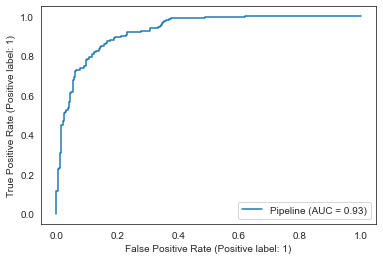

In [84]:
# roc auc
plot_roc_curve(log_tvec_model, X_test["clean_com_text"], y_test)

Based on the curve above, ROC AUC is close to 1 (0.93). This indicates that the positive and negative populations (EPL and CPL posts) are almost perfectly separated. This confirms that the logistic regression with TF-IDF vectorization is suitable for the objective of this project and it is the best model amongst the models that have been tested.

### Top Features

In [85]:
# top 20 features for each class
feature_names = log_tvec_model.named_steps["tvec"].get_feature_names()
top_eplfeat = sorted(zip(log_tvec_model.named_steps["lr"].coef_[0, :], feature_names), reverse=True)[:20]
top_cplfeat = sorted(zip(log_tvec_model.named_steps["lr"].coef_[0, :], feature_names), reverse=False)[:20]    

cplfeat_df = pd.DataFrame(top_cplfeat, columns = ["coef", "feature"])
eplfeat_df = pd.DataFrame(top_eplfeat, columns = ["coef", "feature"])
topfeat_df = pd.concat([eplfeat_df, cplfeat_df], axis=0).reset_index(drop=True)

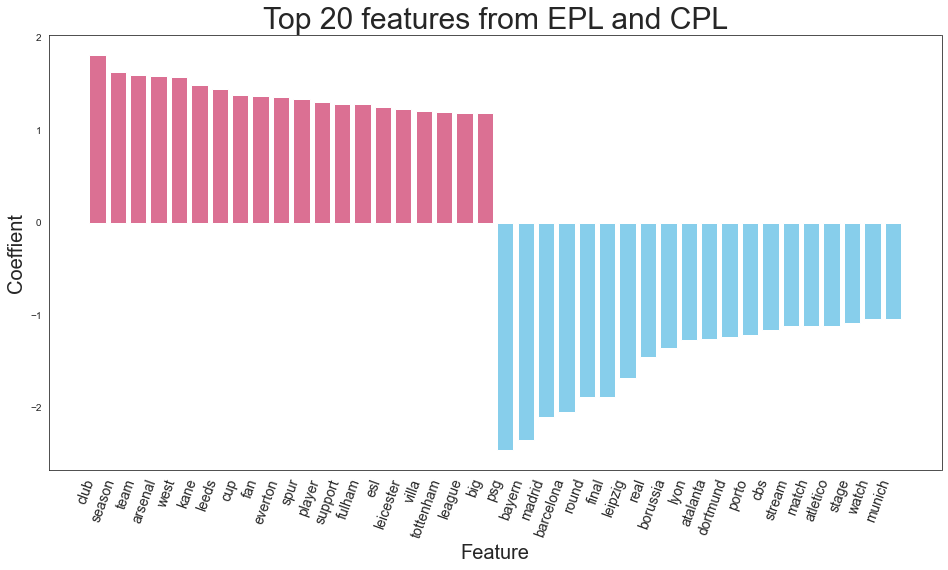

In [86]:
plt.figure(figsize=(16, 8))
    
# create a list of colors to map to the bars for positive and negative coefficients
colors = ["skyblue" if c < 0 else "palevioletred" for c in topfeat_df["coef"]]
    
# plot coefficients
plt.bar(np.arange(2 * 20), topfeat_df["coef"], color=colors)
    
# create ticks on x axis from feature names
feature_names = np.array(topfeat_df["feature"])
plt.xticks(np.arange(2 * 20), topfeat_df["feature"], rotation=70, ha="right", size=14)
    
# set plot attributes
plt.title("Top 20 features from EPL and CPL", fontsize=30)
plt.ylabel("Coeffient", fontsize=20)
plt.xlabel('Feature', fontsize=20);
plt.show()

Based on the coefficients of the top features, team names are some of the most important features in predicting whether the post belongs to the EPL subreddit. Specifically, mid/low-tiered football clubs that are not involved in the champions leage are some of the important features for EPL subreddit. These clubs includes Fullham, Everton and Leeds. 

Additionally, terms that are specific and related to the English domestic league are also identified to be important.  Words like cup which refers to the FA cup is synonymous with the English domestic league. 

Similarly, team names are also some of the most important features for CPL subreddit. Specifically, European non-English clubs are some of the important features for CPL subreddit. These clubs include PSG and Bayern which are only found in CPL subreddit and have high coefficients. 

Additionally, words that are specific to the format of the CPL tournament are also found to be important features. Specifically, terms like final, round and stage which are closely associated to the different stages in the Champions League tournament are found to be important and have high coefficients.

## 8. Conclusions/Next Steps
---

### Conclusions

The EPL and CPL subreddits have many common words, as indicated by the top n-grams. Hence, words and phrases that are specific to each subreddit are essential. For both EPL and CPL subreddits, team names are important in classifying the posts between the subreddits. This because mentions of top-tiered clubs like Manchester City can be found in both subreddits. Hence, for EPL subreddit, words related to low and mid-tiered clubs like Everton are important as these clubs are only mentioned in the EPL subreddit. Meanwhile, for CPL subreddit, European non-English clubs like PSG are important.

Furthermore, words that are specific to the respective league are also important. For EPL subreddit, words that are associated with the domestic football league like cup are important. Mentions about domestic english competitions like FA cup are likely only to be discussed on the EPL subreddit. Meanwhile, for CPL subreddit, final, round and stage, are important. These words refer to the different stages of the CPL competition.

Overall, Logistic Regression model with TF-IDF vectorization is the best model that would predict whether a specific post belongs to the English Premier League subreddit. It has high test accuracy and high precision score. Its ROC AOC is close to 1 (0.93), indicating that the positive and negative populations (EPL and CPL posts) are almost perfectly separated. This further confirms that the logistic regression with TF-IDF vectorization is suitable for the objective of this project and it is the best model amongst all the models that have been tested.

### Next Steps

Even though Logistic Regression model with TF-IDF vectorization is concluded to be the best model, there are a few drawbacks with this model. One of the drawbacks that is evident is overfitting. Since the data used to train this model is high dimensional, this model may need to be run with larger dataset to reduce overfitting.

Hence, for the next step, more data from the same subreddits should be incorporated. Additionally, other models like Random Forest should also be tested. Random Forest Classifier is said to be useful in dealing with high dimensional noisy data. As it is based on bagging algorithm and uses ensemble learning technique, using this model may reduce overfitting problem and also reduces the variance. Therefore, the model may help to imporve the accuracy.